In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


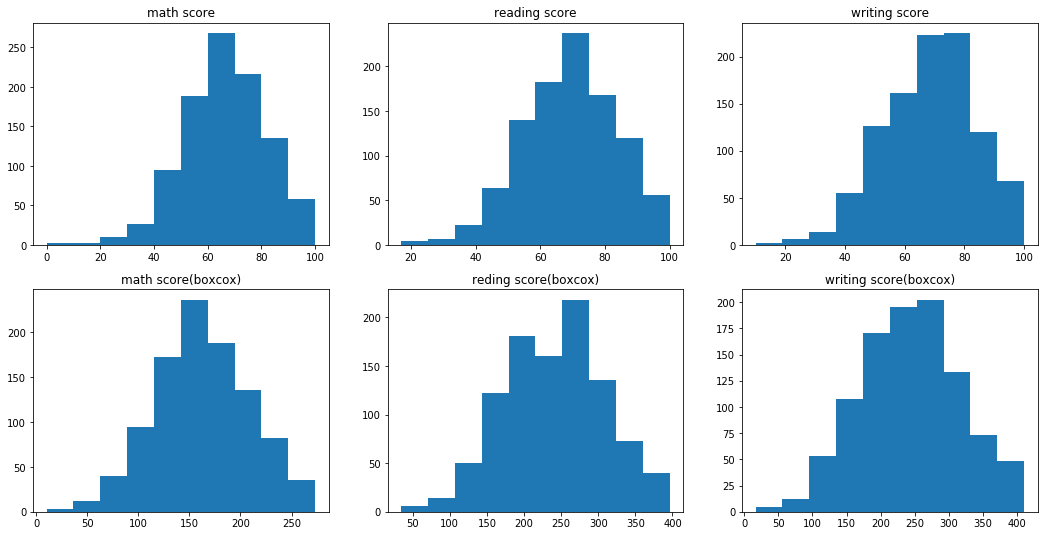

In [4]:
from scipy.stats import boxcox

math_boxcox,_ = boxcox(df[df['math score']>0]['math score'])
reading_boxcox,_ = boxcox(df['reading score'])
writing_boxcox,_ = boxcox(df['writing score'])

plt.figure(figsize=(18,9))

plt.subplot(2,3,1)
plt.hist(df['math score'])
plt.title('math score')

plt.subplot(2,3,2)
plt.hist(df['reading score'])
plt.title('reading score')

plt.subplot(2,3,3)
plt.hist(df['writing score'])
plt.title('writing score')

plt.subplot(2,3,4)
plt.hist(math_boxcox)
plt.title('math score(boxcox)')

plt.subplot(2,3,5)
plt.hist(reading_boxcox)
plt.title('reding score(boxcox)')

plt.subplot(2,3,6)
plt.hist(writing_boxcox)
plt.title('writing score(boxcox)')

plt.show()

In [5]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox

for i in ['math score', 'reading score', 'writing score']:
    print('{}:'.format(i))
    print('The jarque bera is {} and pvalue is {}'.format(jarque_bera(df[i])[0],jarque_bera(df[i])[1]))
    print('The normal tets is {} and pvalue is {}'.format(normaltest(df[i])[0],normaltest(df[i])[1]))
    

math score:
The jarque bera is 15.912256686712709 and pvalue is 0.0003505075386818213
The normal tets is 15.408960513931822 and pvalue is 0.00045080293869937836
reading score:
The jarque bera is 11.383300575987892 and pvalue is 0.0033740202672214448
The normal tets is 11.11741279628622 and pvalue is 0.003853758403576582
writing score:
The jarque bera is 13.98509448257235 and pvalue is 0.0009187033894586527
The normal tets is 13.606450837263859 and pvalue is 0.0011101885439899974


In [6]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


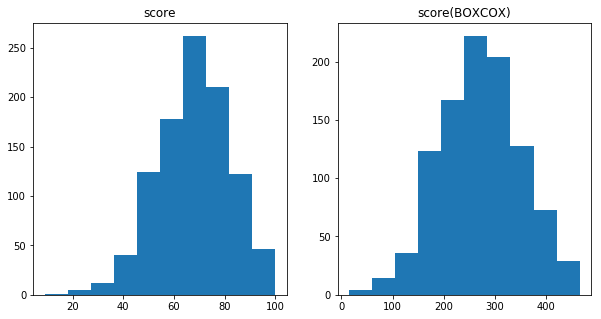

In [7]:
df['score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3 

score_boxcox,_ = boxcox(df['score'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df['score'])
plt.title('score')

plt.subplot(1,2,2)
plt.hist(score_boxcox)
plt.title('score(BOXCOX)')
plt.show()

In [8]:

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jarque_bera(df['score'])[0], jarque_bera(df['score'])[1]))
print("Normality test statistics is {0} and p value is {1}".format(normaltest(df['score'])[0], normaltest(df['score'])[1]))

jb_score = jarque_bera(score_boxcox)
norm_score = normaltest(score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795
